# 1. Setup

Drive illesztése

In [ ]:
from google.colab import drive
from google.colab import files
drive.mount('/content/gdrive', force_remount=True)

import sys
sys.path.append('/content/gdrive/MyDrive/Cloab Notebooks/')

Mounted at /content/gdrive


Könyvtárak létrehozása

In [ ]:
import os
import shutil

# YOLO FOLDER
#yolo_folder = "/content/gdrive/MyDrive/YOLO"
#if (os.path.exists(yolo_folder)):
  #shutil.rmtree(yolo_folder) # Ha létezik már, akkor töröljük
#os.makedirs(yolo_folder, exist_ok=True) # Újra létrehozzuk

# YOLODATA FOLDER
yolo_folder = "/content/gdrive/MyDrive/YOLODATA"
if (os.path.exists(yolo_folder)):
  shutil.rmtree(yolo_folder) # Ha létezik már, akkor töröljük
os.makedirs(yolo_folder, exist_ok=True) # Újra létrehozzuk

Ellenőrizzük, hogy hol járunk a mappa struktúrában

In [ ]:
!ls

gdrive	sample_data


# 2. Install

Yolov5 letöltése a GitHubról

In [ ]:
# YOLOV5 - Előre elkészített súly modell
!rm -rf '/content/yolov5/' # töröljük, ha már telepítve van

!git clone https://github.com/ultralytics/yolov5 # Klónozzuk a yolov5-öt
# Belépünk a yolov5-be, hogy telepítsük
%cd yolov5
!ls

Cloning into 'yolov5'...
remote: Enumerating objects: 16625, done.
remote: Counting objects: 100% (103/103), done.
remote: Compressing objects: 100% (73/73), done.
remote: Total 16625 (delta 58), reused 66 (delta 30), pack-reused 16522
Receiving objects: 100% (16625/16625), 15.16 MiB | 22.15 MiB/s, done.
Resolving deltas: 100% (11415/11415), done.
/content/yolov5
benchmarks.py	 data	     LICENSE	     README.zh-CN.md   tutorial.ipynb
CITATION.cff	 detect.py   models	     requirements.txt  utils
classify	 export.py   pyproject.toml  segment	       val.py
CONTRIBUTING.md  hubconf.py  README.md	     train.py


A yolov5 függőségeinek telepítése

In [ ]:
# a függőségek telepítése
%pip install -qr requirements.txt comet_ml


import torch
#import pytorch
import utils
display = utils.notebook_init()

YOLOv5 🚀 v7.0-314-g60dde7f1 Python-3.10.12 torch-2.3.0+cu121 CPU


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.0/107.7 GB disk)


A yolov5 tesztelése

In [ ]:
!python detect.py --source 'data/images/bus.jpg'
#!python detect.py --source 'data/images/bus.jpg'
#!python detect.py --source '/content/gdrive/MyDrive/YOLO/images/pexels-photo-10118249.jpeg'
#!python detect.py --source '/content/gdrive/MyDrive/YOLO/traning/images/'
# source 0 -> webcamera
# source img.jpg -> képet
# source vid.mp4 -> video
# source screen -> kepernyo elemzese
# source 'https://youtu.be/LNwODJXcvt4' # youtube
# source 'rtsp://example.com/media.mp4' # RTSP, RTMPO, HTTP stream

detect: weights=yolov5s.pt, source=data/images/bus.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-314-g60dde7f1 Python-3.10.12 torch-2.3.0+cu121 CPU

100% 14.1M/14.1M [00:00<00:00, 161MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
image 1/1 /content/yolov5/data/images/bus.jpg: 640x480 4 persons, 1 bus, 496.1ms
Speed: 3.8ms pre-process, 496.1ms inference, 29.4ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp


A yolov5 tesztelése súlyokkal

detect: weights=['yolov5s.pt'], source=data/images/, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-314-g60dde7f1 Python-3.10.12 torch-2.3.0+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
image 1/2 /content/yolov5/data/images/bus.jpg: 640x480 4 persons, 1 bus, 318.4ms
image 2/2 /content/yolov5/data/images/zidane.jpg: 384x640 2 persons, 2 ties, 260.3ms
Speed: 1.9ms pre-process, 289.3ms inference, 3.2ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp6


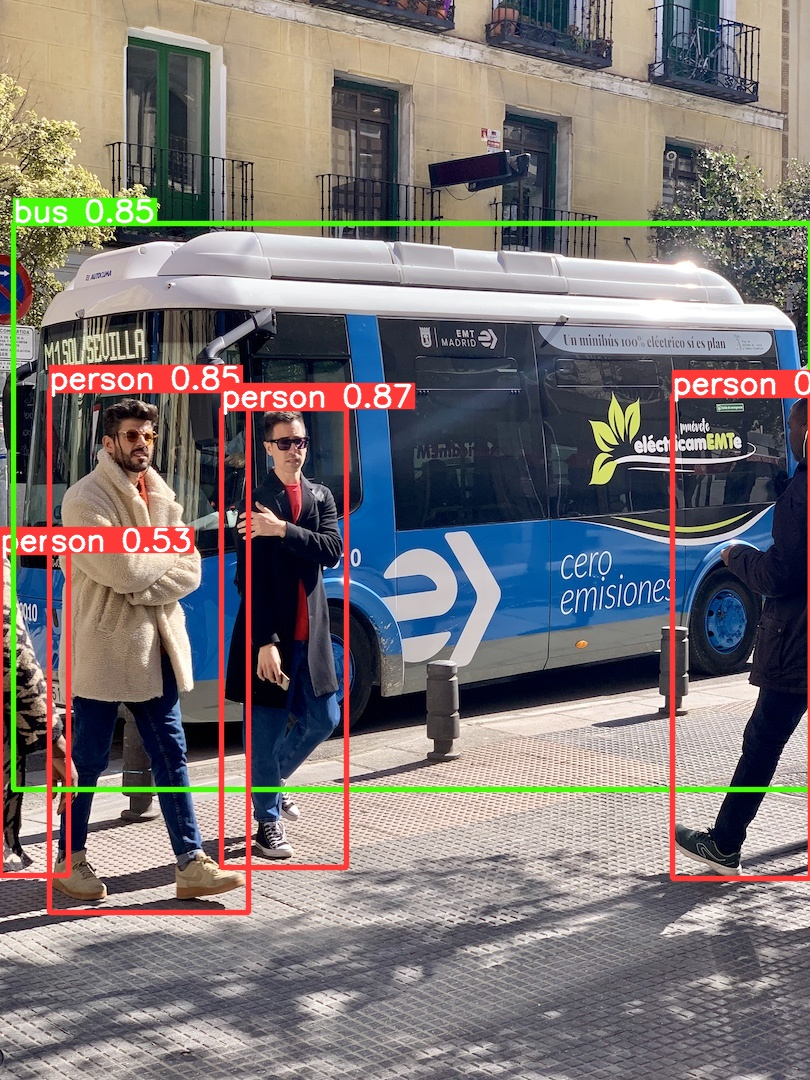

In [ ]:
!python detect.py --weights yolov5s.pt --img 640 --conf 0.25 --source data/images/
#!python detect.py --weights yolov5s.pt --img 640 --conf 0.25 --source /content/gdrive/MyDrive/YOLO/test/images/pexels-photo-10118249.jpeg
#!python detect.py --weights yolov5s.pt --img 640 --conf 0.25 --source /content/gdrive/MyDrive/YOLO/images/pexels-photo-10118249.jpeg

# jelenítse meg az új képeket pl. pexels-photo-9618622.jpeg
display.Image(filename='runs/detect/exp6/bus.jpg') #elöző exp használata és létrehozza a runs/detect/exp2-t, amelyből megjeleníti a képet.


Kép megjelenítése

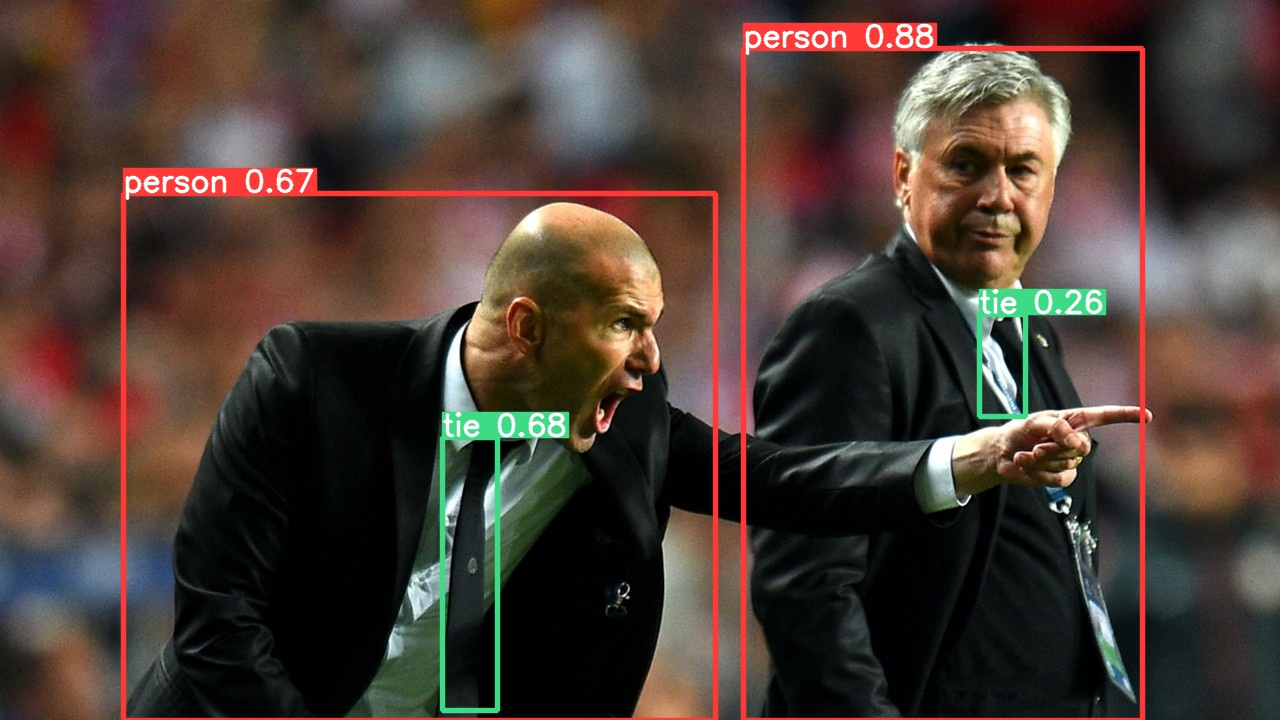

In [ ]:
# jelenítse meg az új képeket pl. pexels-photo-9618622.jpeg
display.Image(filename='runs/detect/exp6/zidane.jpg') #elöző exp használata és létrehozza a runs/detect/exp2-t, amelyből megjeleníti a képet.

Telepítjük a videókártyát (ha a számítógépünk videókártyáját használjuk)
Jelenleg a Colab-ét használjuk

In [ ]:
import torch
from IPython.display import Image, clear_output # to display image
# vagy a videókártyát vagy a CPU-t rendeljük a mátrix műveletekhez
print(torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU')

2.3.0+cu121 CPU


Yaml fájl beolvasása a tréninghez

In [ ]:
# extracting information
%cat /content/gdrive/MyDrive/YOLO/data.yaml
#%cat /content/gdrive/MyDrive/YOLO/data1.yaml

train: /content/gdrive/MyDrive/YOLO/traning/images
val: /content/gdrive/MyDrive/YOLO/validation/images
test: /content/gdrive/MyDrive/YOLO/test/images

nc: 2

names: ["pizza", "no-pizza"]


In [ ]:
# define - Defináljuk az osztályokat és adatokat a tréninghez
import yaml
with open("/content/gdrive/MyDrive/YOLO/data.yaml", 'r') as stream:
  num_classes = str(yaml.safe_load(stream)['nc'])

Loghoz készítünk egy registert

In [ ]:
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def writetemplate(line, cell):
  with open(line, 'w') as f:
    f.write(cell.format(**globals()))

# 3. Training

Telepítjük a súlyok ellenőrzéséhez a Wandb programot

In [ ]:
# Weights & Biases (optional) - Hitelesítés, majd az API kulcs másolása a kért helyre és ENTER
%pip install -q wandb
#!wandb login --relogin
!wandb login

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 16.8 MB/s eta 0:00:00
wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Kezdjük meg a tréninget

In [ ]:
# Mérjük az időt, ezért telepítjük a time-ot Innen /content/yolov5/runs/ másolunk.
%%time
#!python train.py --img-size 640 --batch-size 64 --epoch 100 --data /content/gdrive/MyDrive/YOLO/data.yaml --weights yolov5s.pt --cache
#!cp -R '/content/yolov5/runs/detect/exp8/' '/content/gdrive/MyDrive/YOLODATA/' # az elöbb létrejött és megjelenített runs/detect/exp2


# --batch_size 80 --epoch 300
!python train.py --img-size 320 --batch-size 80 --epoch 300 --data /content/gdrive/MyDrive/YOLO/data.yaml --weights yolov5s.pt --cache
!cp -R '/content/yolov5/runs/train/exp5/' '/content/gdrive/MyDrive/YOLODATA/' # adatok másolása a saját driver-a. az elöbb létrejött és megjelenített runs/detect/exp2


# --batch_size 80 --epoch 300
#!python train.py --img-size 80 --batch-size 80 --epoch 300 --data /content/gdrive/MyDrive/Pizza.v1i.yolov8/data.yaml --weights yolov5s.pt --cache
#!cp -R '/content/gdrive/MyDrive/Pizza.v1i.yolov8/train/images/' '/content/gdrive/MyDrive/YOLODATA/' # adatok másolása a saját driver-a. az elöbb létrejött és megjelenített runs/detect/exp2


wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2024-05-25 20:49:28.508627: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-25 20:49:28.508699: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-25 20:49:28.626904: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
wandb: Currently logged in as: tcsill770815 (aycbph). Use `wandb login --relogin` to force relogin
train: weights=yolov5s.pt, cfg=, data=/content/gdrive/MyDrive/YOLO/data.yaml, hyp=data/hyps/hyp.scratch-l

Az ideiglenes yolov5 mappából (/content/yolov5/runs/detect/exp) az eredményeket, a saját (MyDrive) Google driveunkra másoljuk  #!cp -R '/content/yolov5/detect/exp' '/content/gdrive/MyDrive/YOLODATA/'

In [ ]:
#!cp -R "/content/yolov5/runs/detect/exp2" "/content/gdrive/MyDrive/YOLODATA/" #új ex3 a YOLODATA-ban
!cp -R "/content/yolov5/runs/detect/exp" "/content/gdrive/MyDrive/Pizza.v1i.yolov8/" #új ex3 a YOLODATA-ban


In [ ]:
!cp -R "/content/yolov5/runs/train/exp" "/content/gdrive/MyDrive/YOLODATA/" #új ex3 a YOLODATA-ban

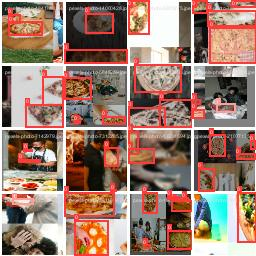

In [ ]:
Image(filename= '/content/gdrive/MyDrive/YOLODATA/exp/train_batch0.jpg', width=800)

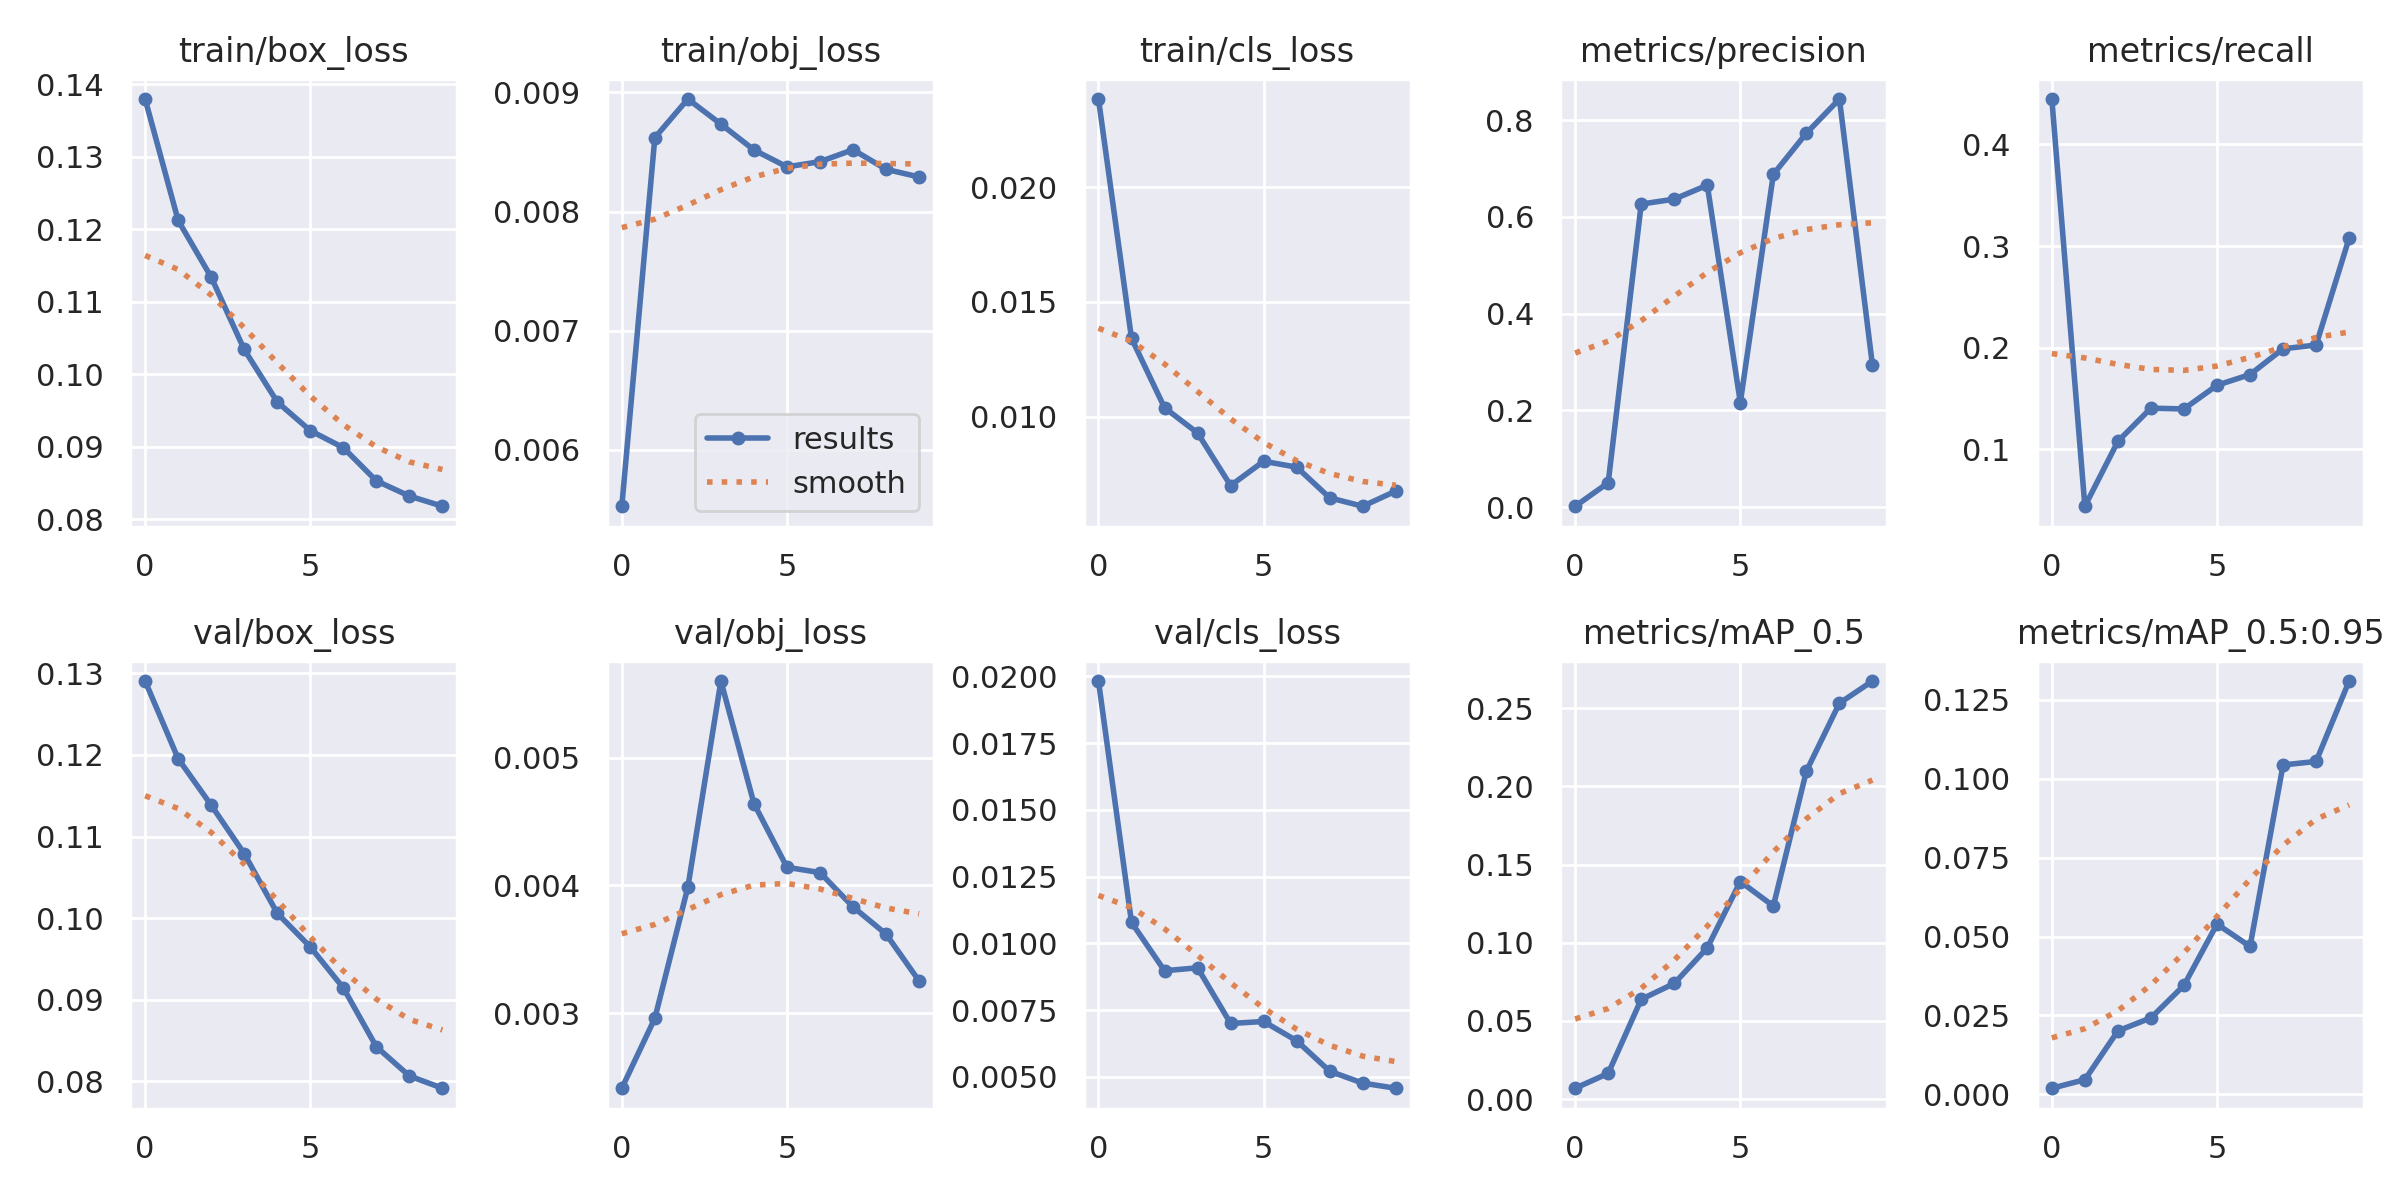

In [ ]:
Image(filename="/content/gdrive/MyDrive/YOLODATA/exp/results.png", width=800)

In [ ]:
#!python detect.py --weights /content/gdrive/MyDrive/YOLODATA/runs/train/exp2/weights/best.pt
!python detect.py --weights /content/gdrive/MyDrive/YOLODATA/exp/weights/best.pt
#!python detect.py --weights /content/yolov5/runs/train/exp/weights/best.pt
#!python detect.py --weights /content/yolov5/runs/train/exp2/weights/best.pt
#!python detect.py --weights yolov5s.pt --source 1 --data   /content/yolov5/runs/train/exp2/weights/best.pt #előbb létrejött /content/yolov5/runs/train/exp/weights mappába
#!python detect.py /content/yolov5/runs/train/exp2/weights/best.pt #előbb létrejött /content/yolov5/runs/train/exp/weights mappába

detect: weights=['/content/gdrive/MyDrive/YOLODATA/exp/weights/best.pt'], source=data/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-314-g60dde7f1 Python-3.10.12 torch-2.3.0+cu121 CPU

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/2 /content/yolov5/data/images/bus.jpg: 640x480 65 pizzas, 358.8ms
image 2/2 /content/yolov5/data/images/zidane.jpg: 384x640 9 pizzas, 258.0ms
Speed: 3.8ms pre-process, 308.4ms inference, 1.1ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp


# 4. Training Logging

Tréning adatok megtekintése #Image(filename='/content/gdrive/MyDrive/YOLODATA/exp4/train_batch0.jpg', width=800) #új exp4 a YOLODATA-ban

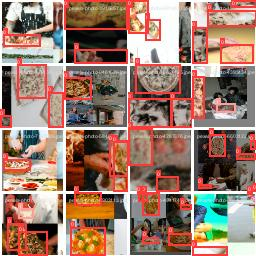

In [ ]:
 Image(filename='/content/gdrive/MyDrive/Pizza.v1i.yolov8/exp3/train_batch0.jpg', width=800)

#Image(filename='/content/gdrive/MyDrive/YOLODATA/exp4/result.jpg', width=800)

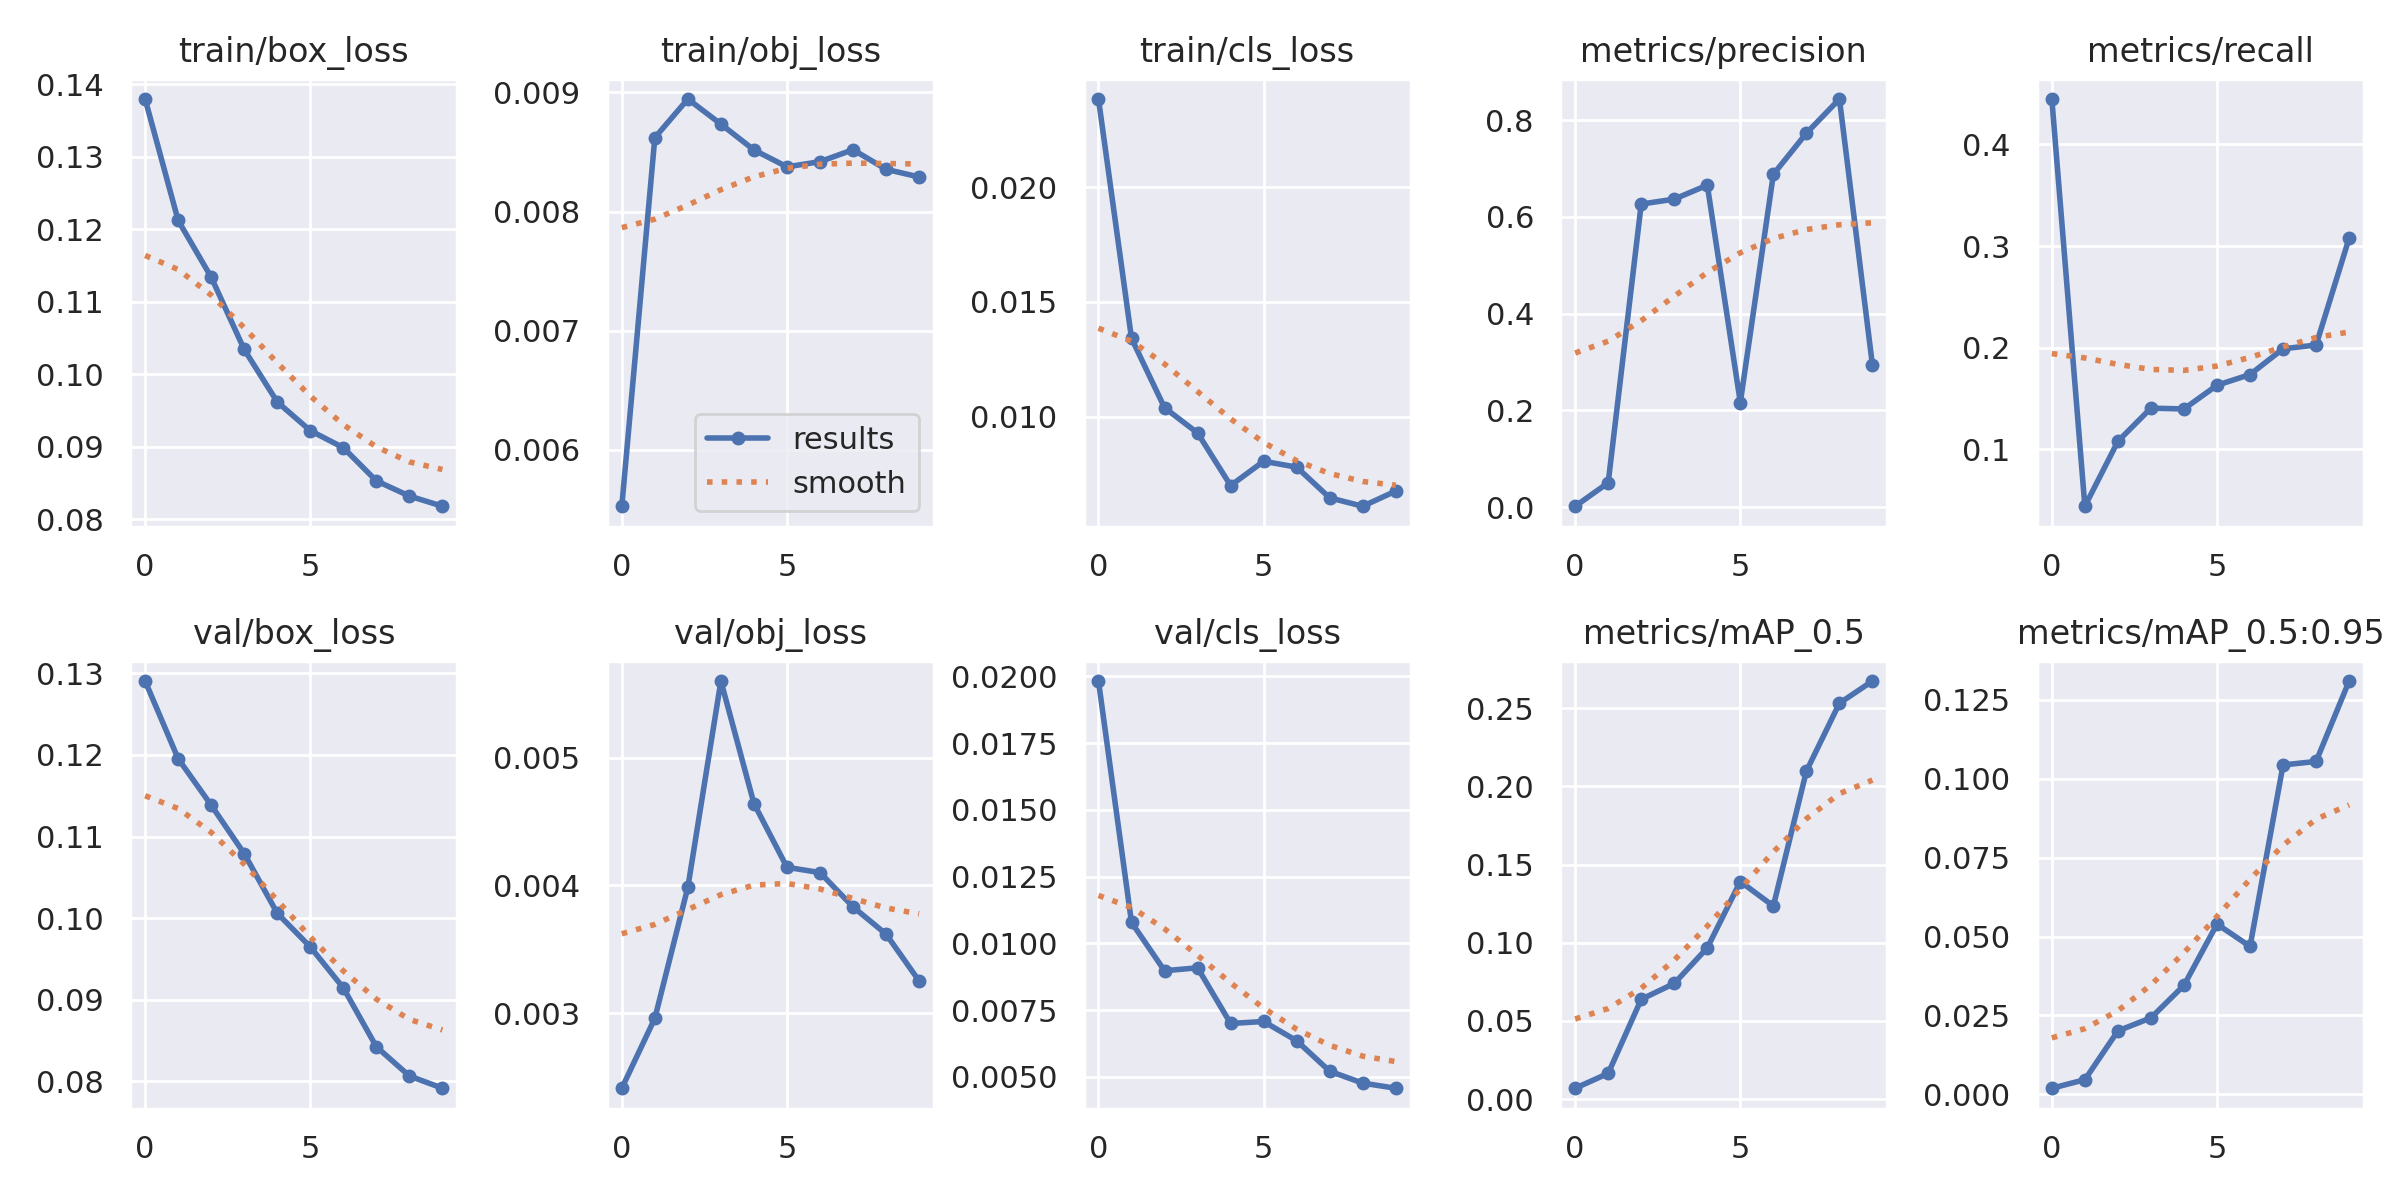

In [ ]:
#Image(filename='/content/gdrive/MyDrive/YOLODATA/exp3/result.jpg', width=800)
Image(filename='/content/gdrive/MyDrive/YOLODATA/exp/results.png', width=800)

# 5. Test Training data

Az elkészült modellünkkel megvizsgáljuk a test mappában lévő képeket

In [ ]:
#!python detect.py --weights /content/gdrive/MyDrive/YOLODATA/exp4/weights/best.pt --img 640 --conf 0.4 --source /content/gdrive/MyDrive/YOLO/test/images/
!python detect.py --weights /content/gdrive/MyDrive/YOLODATA/exp/weights/best.pt --img 640 --conf 0.4 --source /content/gdrive/MyDrive/YOLO/test/images

detect: weights=['/content/gdrive/MyDrive/YOLODATA/exp/weights/best.pt'], source=/content/gdrive/MyDrive/YOLO/test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-314-g60dde7f1 Python-3.10.12 torch-2.3.0+cu121 CPU

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/1570 /content/gdrive/MyDrive/YOLO/test/images/italian-pizza-restaurant-dinner.jpg: 640x640 16 pizzas, 737.2ms
image 2/1570 /content/gdrive/MyDrive/YOLO/test/images/pexels-photo-10025399.jpeg: 640x640 2 pizzas, 475.7ms
image 3/1570 /content/gdrive/MyDrive/YOLO/test/images/pexels-photo-10068752.jpeg: 640

A megvizsgált képeket jelennítsük is meg

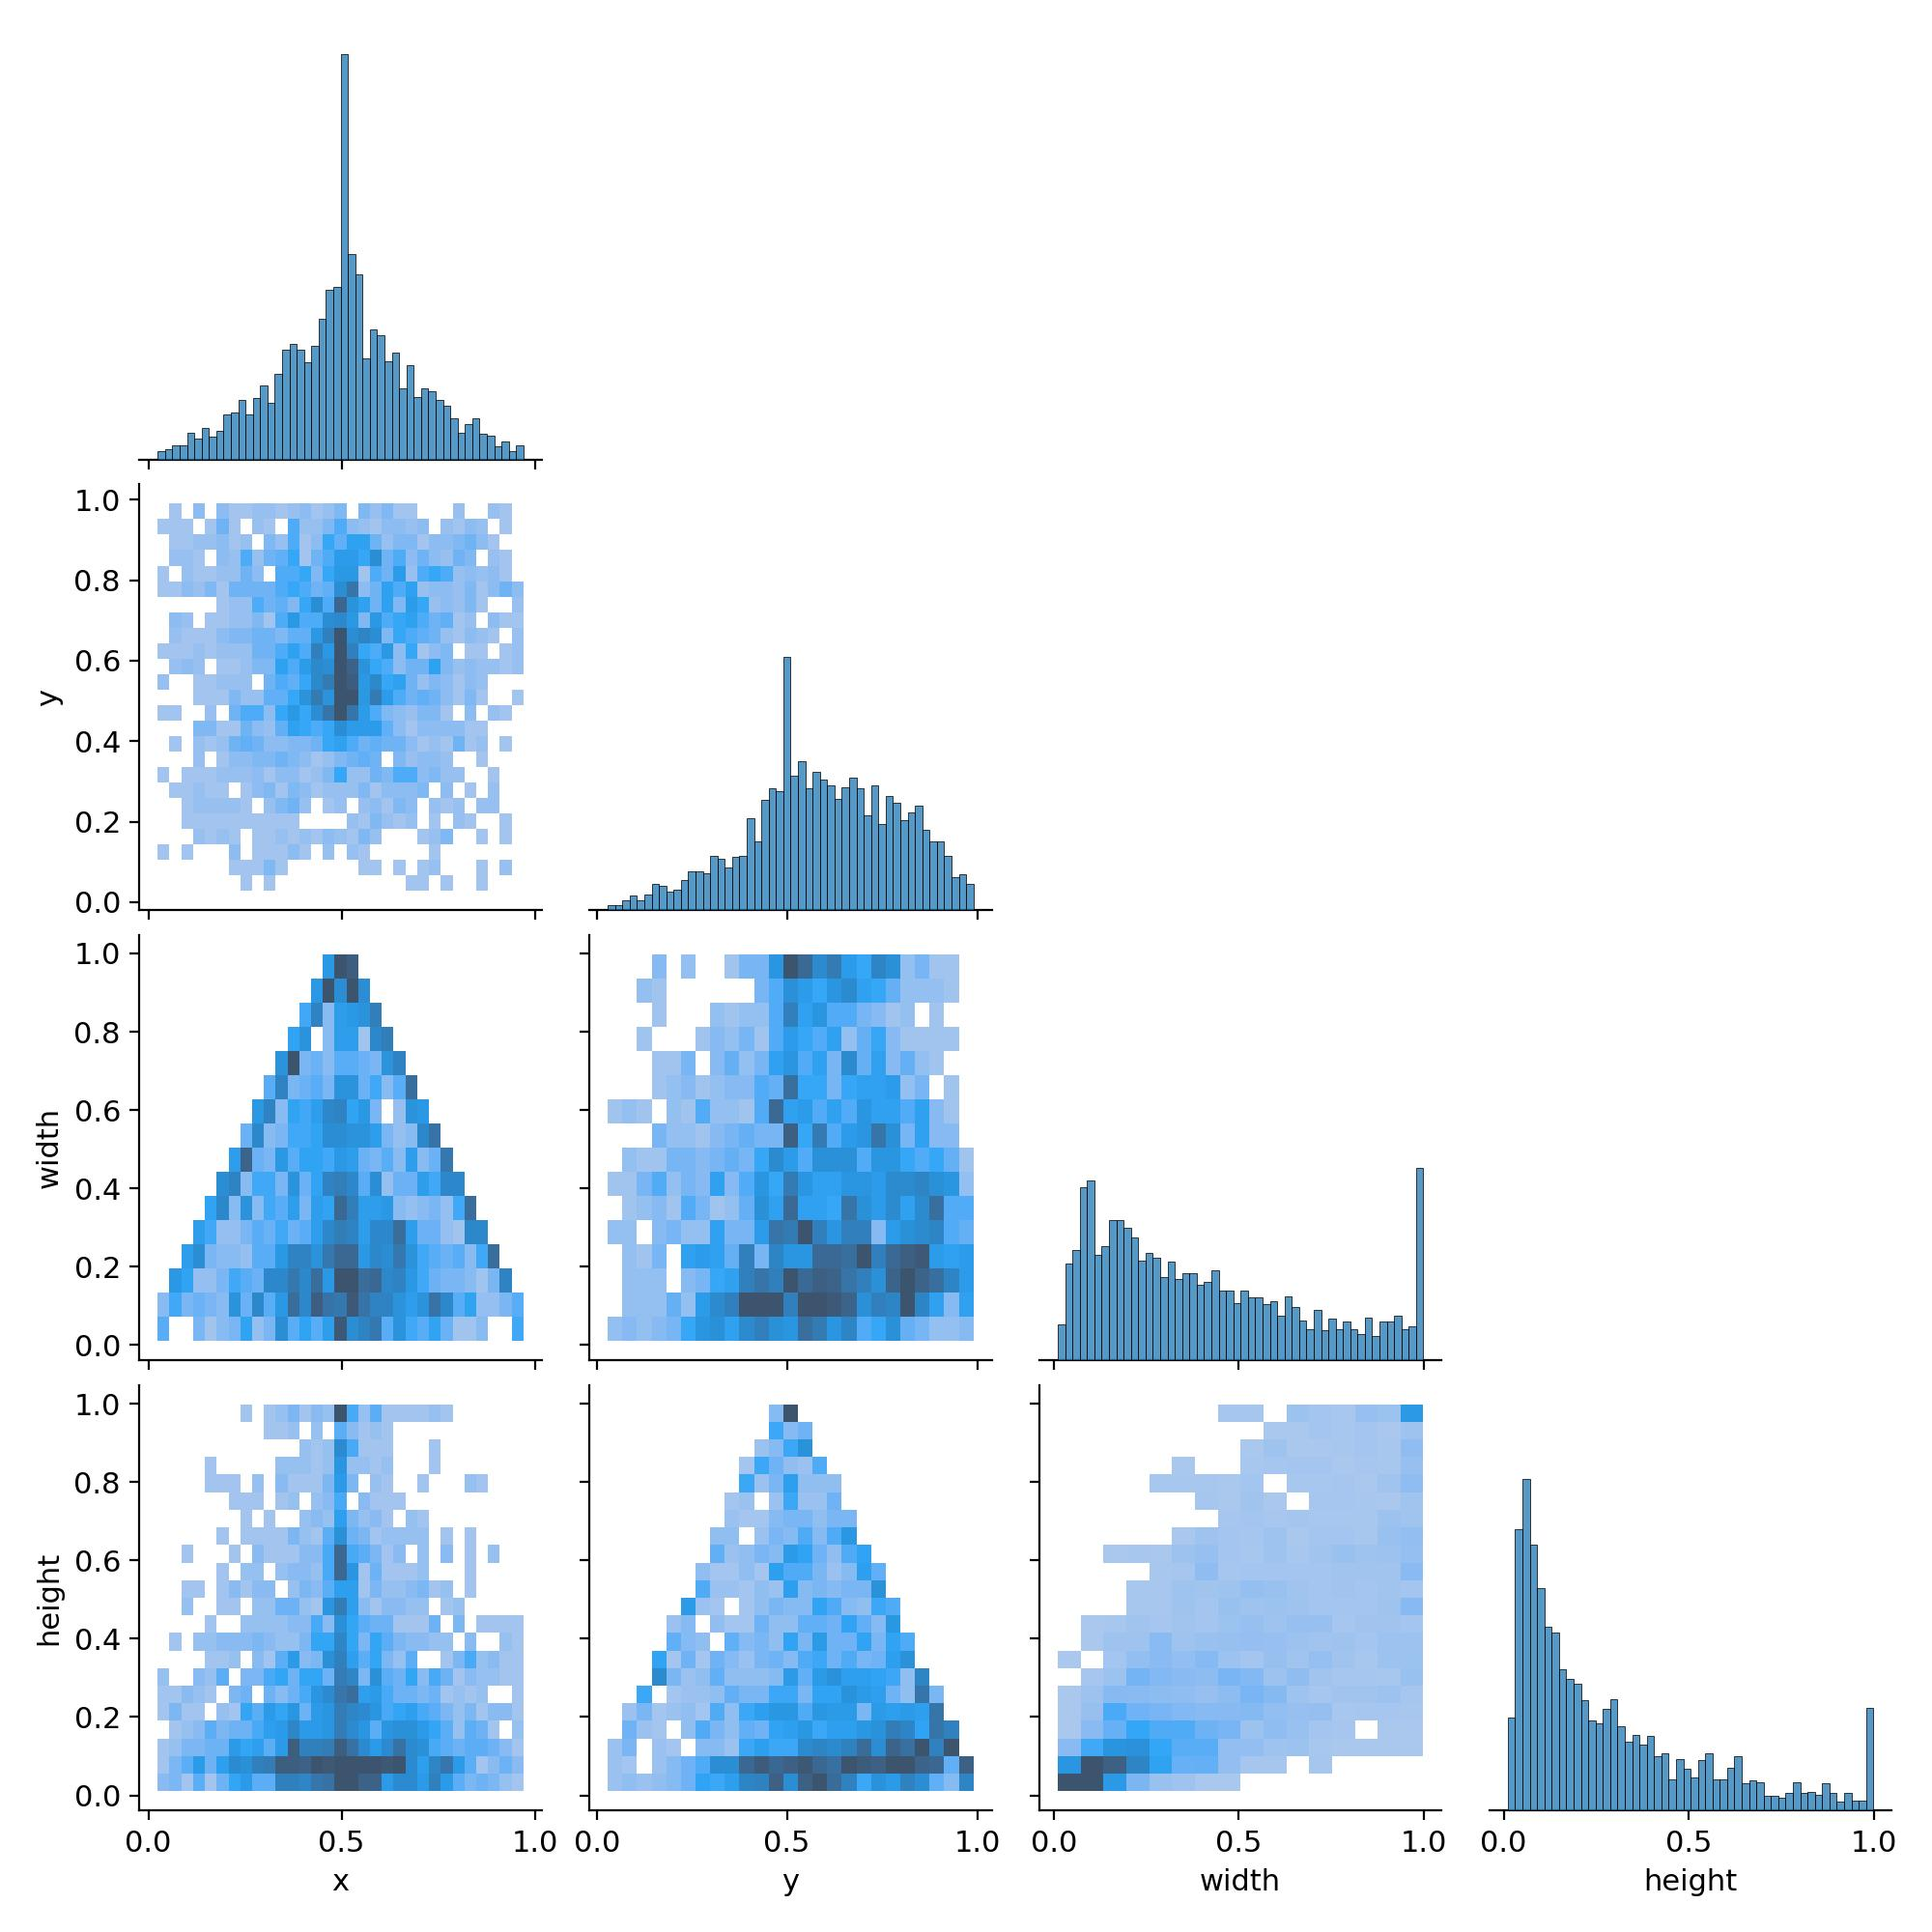

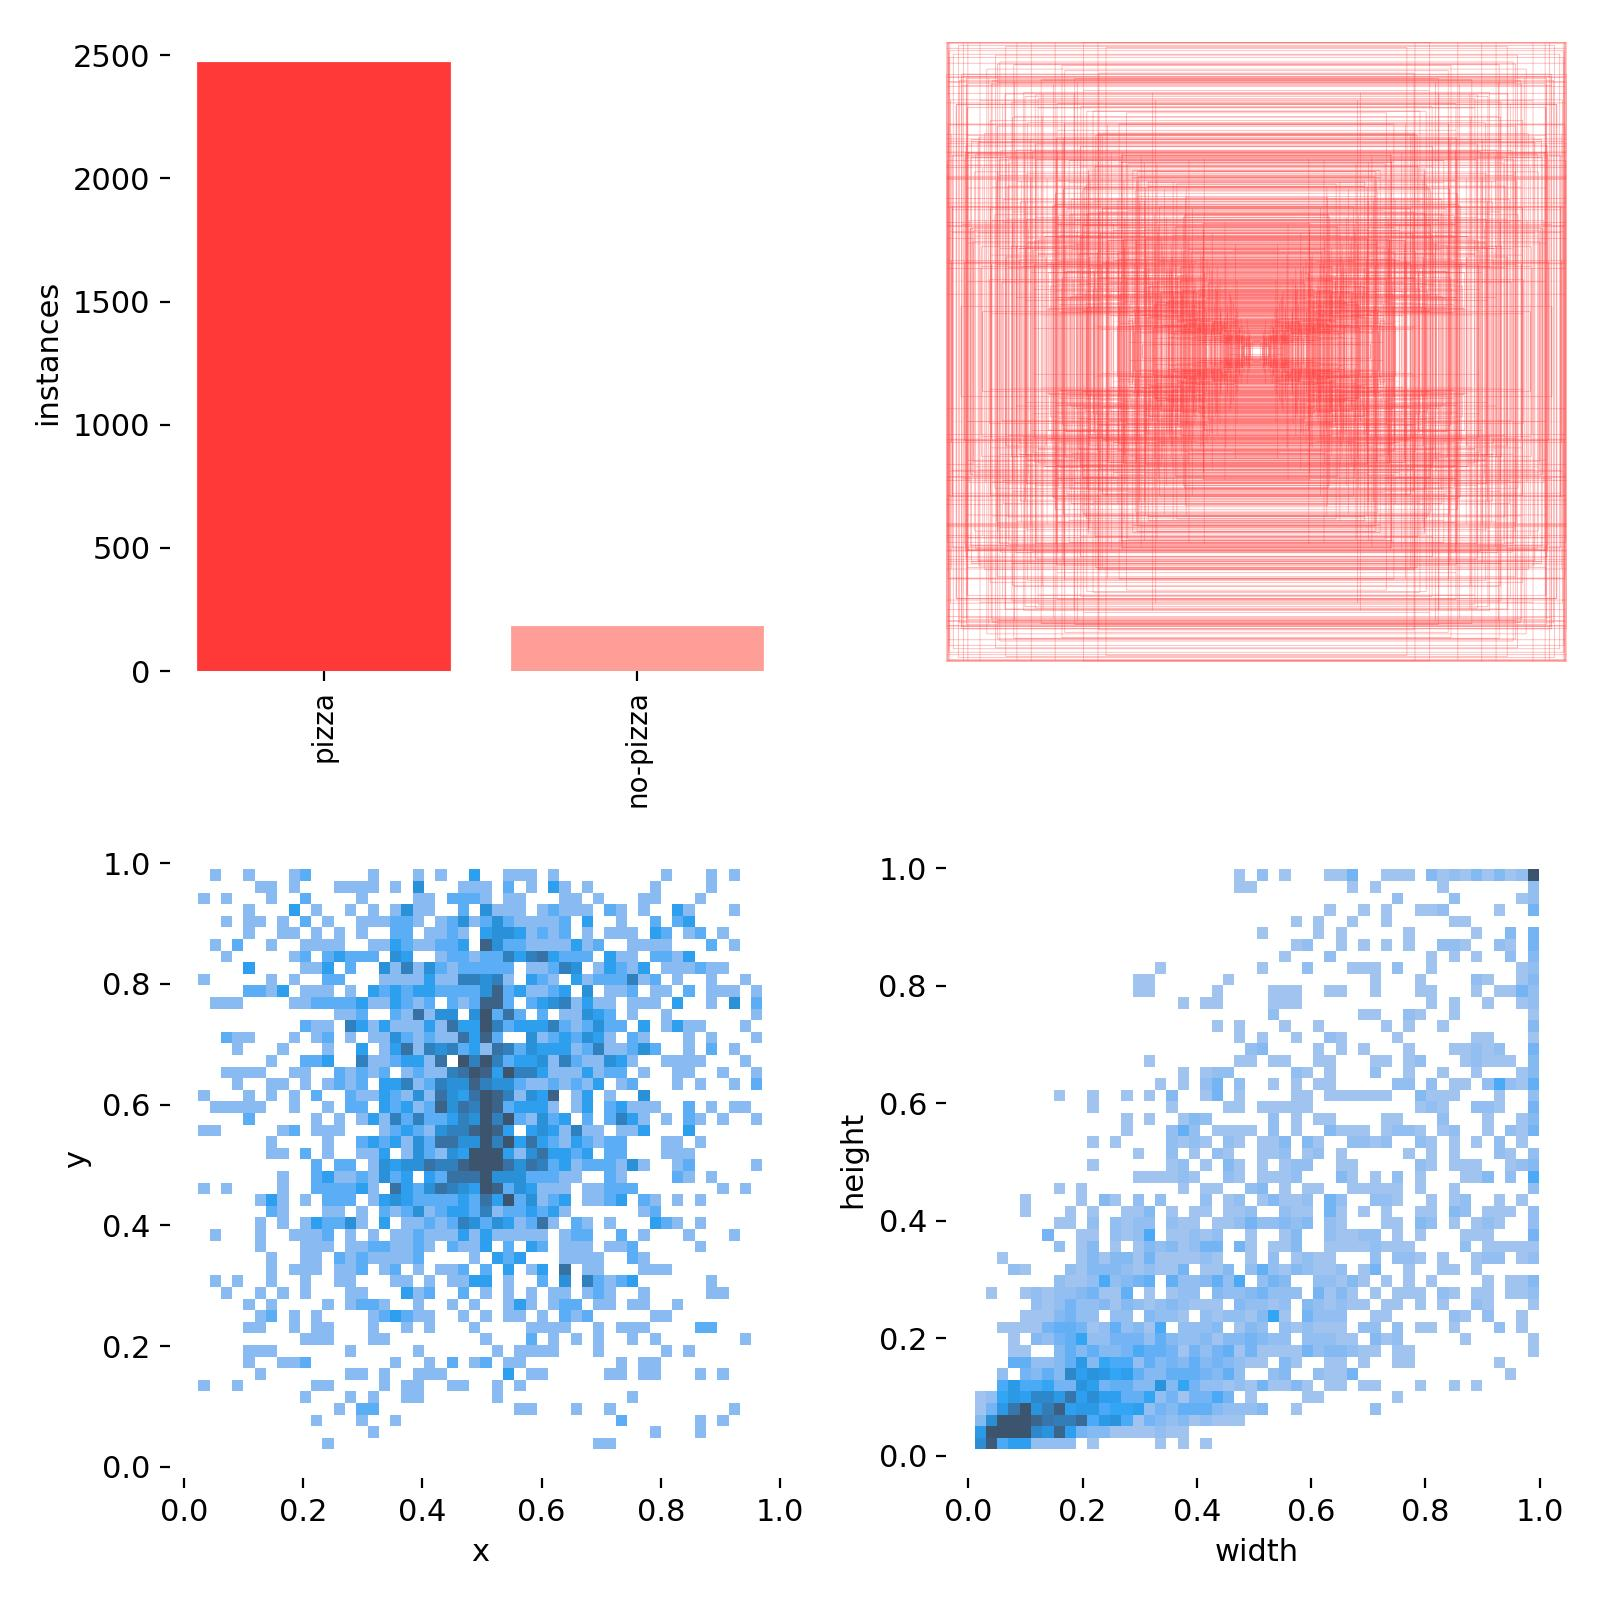

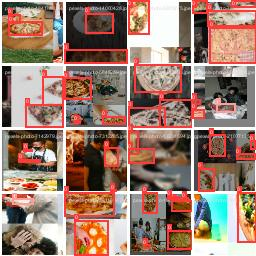

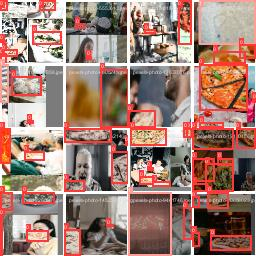

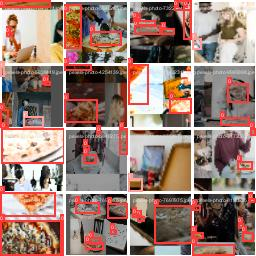

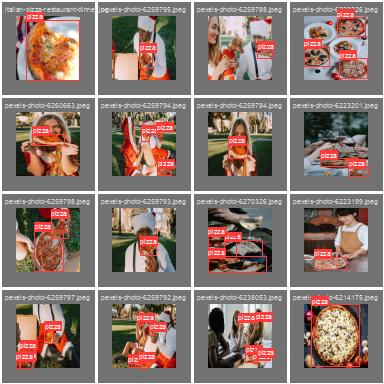

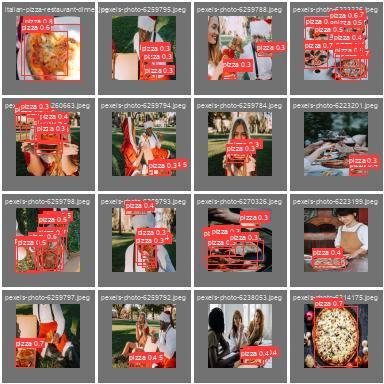

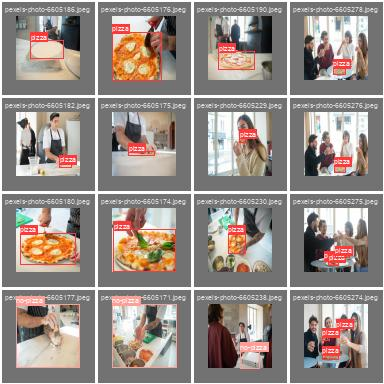

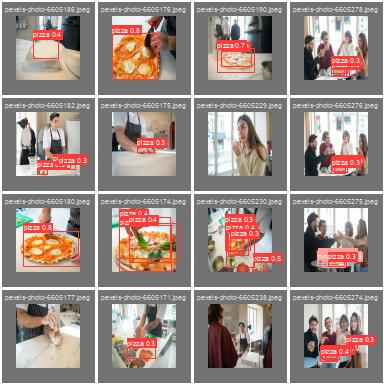

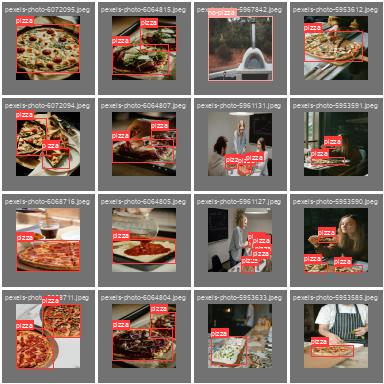

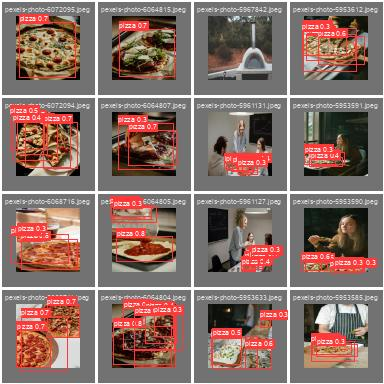

In [ ]:
import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/gdrive/MyDrive/YOLODATA/exp/*.jpg'):
  display(Image(filename=imageName))
  print("\n")

 # 6. Convert PT to ONNX

Átalakítjuk a best.pt fájlunkat egy open-source ONNX fájlra, így már integrálható lesz más programokba

In [ ]:
#!pip install -U coremltools onnx scikit-learn # export requirements 0.19.2 or 0.22.2
!python export.py --weights /content/gdrive/MyDrive/YOLODATA/exp/weights/best.pt --include torchscript onnx

export: data=data/coco128.yaml, weights=['/content/gdrive/MyDrive/YOLODATA/exp/weights/best.pt'], imgsz=[640, 640], batch_size=1, device=cpu, half=False, inplace=False, keras=False, optimize=False, int8=False, per_tensor=False, dynamic=False, simplify=False, opset=17, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['torchscript', 'onnx']
YOLOv5 🚀 v7.0-314-g60dde7f1 Python-3.10.12 torch-2.3.0+cu121 CPU

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs

PyTorch: starting from /content/gdrive/MyDrive/YOLODATA/exp/weights/best.pt with output shape (1, 25200, 7) (13.6 MB)

TorchScript: starting export with torch 2.3.0+cu121...
TorchScript: export success ✅ 3.8s, saved as /content/gdrive/MyDrive/YOLODATA/exp/weights/best.torchscript (27.2 MB)
requirements: Ultralytics requirement ['onnx>=1.12.0'] not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Teszteljük le az onnx fájlunk működését

In [ ]:
!python detect.py --weights /content/gdrive/MyDrive/YOLODATA/exp/weights/best.onnx --img 640 --conf 0.4 --source /content/gdrive/MyDrive/YOLO/test/images/ --save-crop

detect: weights=['/content/gdrive/MyDrive/YOLODATA/exp/weights/best.onnx'], source=/content/gdrive/MyDrive/YOLO/test/images/, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=True, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-314-g60dde7f1 Python-3.10.12 torch-2.3.0+cu121 CPU

Loading /content/gdrive/MyDrive/YOLODATA/exp/weights/best.onnx for ONNX Runtime inference...
requirements: Ultralytics requirement ['onnxruntime'] not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 72.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 160.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8

In [ ]:
!cp -R '/content/yolov5/runs/detect/exp' '/content/gdrive/MyDrive/YOLODATA/'

Másoljuk át az ideiglenes yolov5 mappánkból a saját drive-ra

In [ ]:
!cp -R '/content/gdrive/MyDrive/YOLODATA/exp/weights/best.onnx' '/content/gdrive/MyDrive/YOLODATA/'